# Step 4. Exploratory data analysis (Python)

In addition to the data you retrieved in the previous tasks, you've been given a second file. You now have these two CSVs:

**/datasets/project_sql_result_01.csv. 
It contains the following data:
* company_name: taxi company name
* trips_amount: the number of rides for each taxi company on November 15-16, 2017.

**/datasets/project_sql_result_04.csv. **
It contains the following data:
*  dropoff_location_name: Chicago neighborhoods where rides ended
*  average_trips: the average number of rides that ended in each neighborhood in November 2017.

For these two datasets you now need to
- import the files
- study the data they contain
- make sure the data types are correct
- identify the top 10 neighborhoods in terms of drop-offs
- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the results

In [72]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy import stats as st
%matplotlib inline

In [73]:
path = '/datasets/'
path1 = path + 'project_sql_result_01.csv'
path2 = path + 'project_sql_result_04.csv'
path3 = path + 'project_sql_result_07.csv'
df_cmpnytrip = pd.read_csv(path1 ,sep=',')
df_loctrip = pd.read_csv(path2 ,sep=',')
df_weather = pd.read_csv(path3 ,sep=',')


In [74]:
display(df_cmpnytrip.head())
display(df_cmpnytrip.info())
display(df_cmpnytrip.isnull().sum())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

company_name    0
trips_amount    0
dtype: int64

**CONCLUSION**
- 64 records in Company data
- There are no null columns in the dataframe for company, number of trips. 
- The company name is an object, trips_amount is integer. No need to change the datatypes.
- There is no Null value in any record so no need to handle Nans.

In [75]:
display(df_loctrip.head())
display(df_loctrip.info())
display(df_loctrip.isnull().sum())

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

dropoff_location_name    0
average_trips            0
dtype: int64

**CONCLUSION**

- 94 records in location data
- There are no null columns in the dataframe for location, average number of trips.
- The location name is an object, average trips is float. No need to change the datatypes.
- There is no Null value in any record so no need to handle Nans.

In [76]:
display(df_weather.head())
display(df_weather.info())
display(df_weather.isnull().sum())

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

1068 records in weather data.

**CONCLUSION**

- Dataframe for weather with info on start_time, weather_conditions, duration in seconds of the taxi ride. 
- There is no Null value in any record so no need to handle Nans.

**Data type changes**
- Weather_conditions is object, duration_seconds is float. No need to change the datatypes.
- The time is an object, should be changed to datetime datatype.

**Add duration in minutes**
- We have duration in seconds. We should add another column for duration in minutes since most trips are in minutes or hours. This will also give more clarity in our graphs and charts,

# Analysis of  Locations and Number of dropoffs

In [77]:
df_loctrip.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


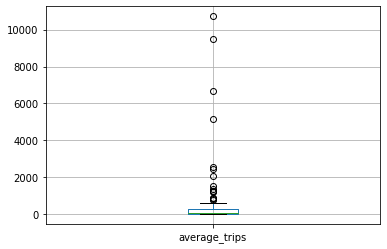

In [78]:
df_loctrip.boxplot()

**CONCLUSION**

- The boxplot for locations shows that many locations have trip_amounts above the 75% quartile.
- Mean is higher than double of the 75% quartile range, that implies many #average_trips are above the 75% quartile range.

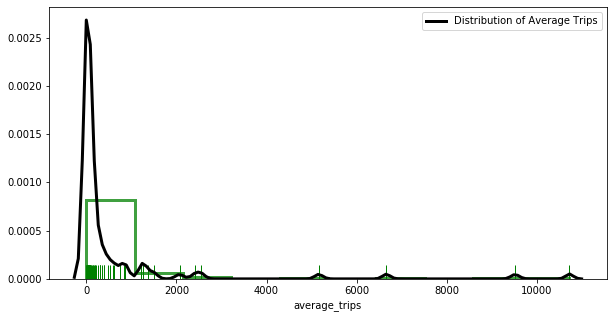

In [79]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df_loctrip['average_trips'], bins=10,rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "Distribution of Average Trips"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": .75, "color": "g"})

In [80]:
df_loctrip.skew()

average_trips    4.520761
dtype: float64

**CONCLUSION**
- The distribution plot shows that only a few locations have the highest number of average trips (>10,000).
- Most locations have #average_trips in the range from 1 - 1000.
- The distribution is asymmetric (the right tail is longer than the left tail). 
- The positive skew factor shows that the distribution has a right tail.
- This right tailed distribution or a  positively skewed distribution will have its mean greater than the median as the outliers present in the skewed right tail of the distribution influence the mean.
- The skew factor and the graph illustrate that most of the dropoff locations had 1000 or less average trips. The mass of the distribution is concentrated on the left of the figure.

In [81]:
df_loctrip['bins']  = pd.cut(df_loctrip['average_trips'],10 )
df_loctrip_bins_stats = df_loctrip.pivot_table(index='bins',values=['average_trips'],aggfunc=['sum','count'])
df_loctrip_bins_stats.columns=['sum_average_trips','total_locations']
display(
df_loctrip.pivot_table(index=['bins','dropoff_location_name'],values=['average_trips'],aggfunc=['sum']).head(),
df_loctrip.pivot_table(index=['bins','dropoff_location_name'],values=['average_trips'],aggfunc=['sum']).tail(),
df_loctrip_bins_stats)

sum
                                         average_trips
bins               dropoff_location_name              
(-8.926, 1074.367] Albany Park              180.900000
                   Andersonville             16.866667
                   Archer Heights             8.366667
                   Armour Square             77.033333
                   Ashburn                   16.133333

,,sum
,,average_trips
bins,dropoff_location_name,
"(2146.933, 3219.5]",O'Hare,2546.900000
"(4292.067, 5364.633]",West Loop,5163.666667
"(6437.2, 7509.767]",Streeterville,6664.666667
"(8582.333, 9654.9]",River North,9523.666667
"(9654.9, 10727.467]",Loop,10727.466667


,sum_average_trips,total_locations
bins,,
"(-8.926, 1074.367]",10687.183783,82
"(1074.367, 2146.933]",8661.133333,6
"(2146.933, 3219.5]",4967.866667,2
"(3219.5, 4292.067]",0.000000,0
"(4292.067, 5364.633]",5163.666667,1
"(5364.633, 6437.2]",0.000000,0
"(6437.2, 7509.767]",6664.666667,1
"(7509.767, 8582.333]",0.000000,0
"(8582.333, 9654.9]",9523.666667,1


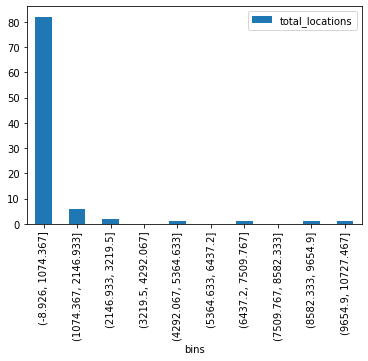

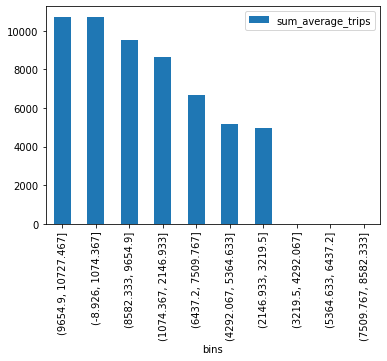

In [82]:
df_loctrip_bins_stats[['total_locations']].plot(kind='bar')
df_loctrip_bins_stats[['sum_average_trips']].sort_values(by=['sum_average_trips'],ascending=False).plot(kind='bar')

**CONCLUSION**

- The above range based analysis displays that 82 locations had approximately 1000 trips, and 2 locations had more than 9000 dropoffs each. These 2 locations maybe nearest to the airport in Chicago.
- This proves the skewness in the distribution.

In [83]:
#- identify the top 10 neighborhoods in terms of drop-offs
loctrip_stats = df_loctrip.pivot_table(index=['dropoff_location_name'],aggfunc='sum').sort_values(['average_trips'],ascending=False)
loctrip_stats_top_ten = loctrip_stats.head(10)
display(loctrip_stats_top_ten)

,average_trips
dropoff_location_name,
Loop,10727.466667
River North,9523.666667
Streeterville,6664.666667
West Loop,5163.666667
O'Hare,2546.900000
Lake View,2420.966667
Grant Park,2068.533333
Museum Campus,1510.000000
Gold Coast,1364.233333


**CONCLUSION**
- This table displays the top 10 locations of drop-off.

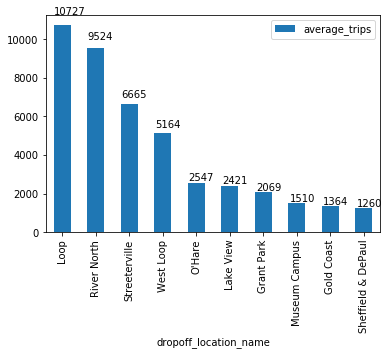

<Figure size 1440x1440 with 0 Axes>

In [84]:
#Bar chart top-10 neighborhoods
ax = loctrip_stats_top_ten.plot(kind='bar')
plt.figure(figsize=(20,20))
for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.05))
plt.show()

**CONCLUSION**
- This bar chart displays the top 10 locations from the highest number of average trips to the lowest.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


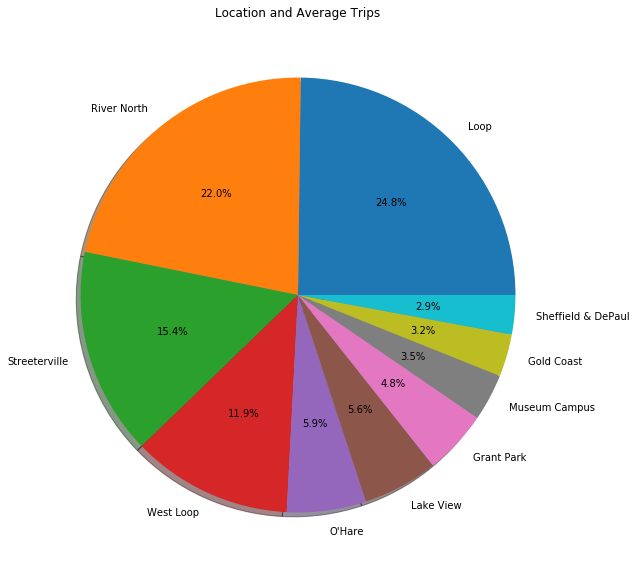

In [85]:
#Pie chart top 10 neighborhoods
labels = loctrip_stats_top_ten.index
plt.figure(figsize=(10,10))
plt.pie(loctrip_stats_top_ten,labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('Location and Average Trips')
plt.show()

**CONCLUSION**

- Biggest share is of Loop, River North, Streeterville and West Loop in the top-10

**Graphs: Taxi companies and number of rides**

- Distribution of rides amongst all taxi companies (Distribution chart)
- Box plot to see quartile ranges
- Top 10 taxi companies and their rides (Bar chart, pie chart)

# Analysis of  Taxi Companies and Number of Trips

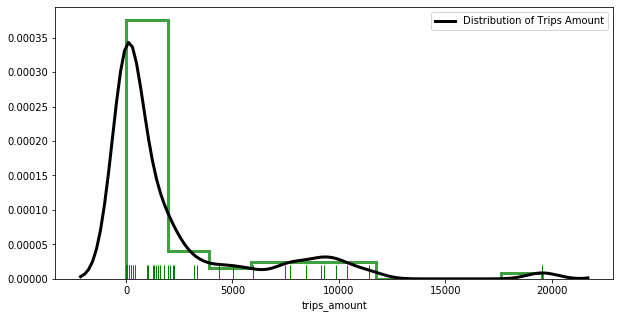

In [86]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df_cmpnytrip['trips_amount'], bins=10,rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "Distribution of Trips Amount"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": .75, "color": "g"})

In [87]:
df_cmpnytrip.skew()

trips_amount    2.404351
dtype: float64

**CONCLUSION**

- The distribution plot shows that only a few companies have the highest number of trips.
- Most companies have #trips in the range from 0 -2000.
- The distribution is asymmetric (the right tail is longer than the left tail). 
- The positive skew factor shows that the distribution has a right tail.
- This right tailed distribution or a  positively skewed distribution will have its mean greater than the median as the outliers present in the skewed right tail of the distribution influence the mean.
- The skew factor and the graph illustrate that most of the dropoff locations had 2000 or less average trips. The mass of the distribution is concentrated on the left of the figure.

In [88]:
df_cmpnytrip.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


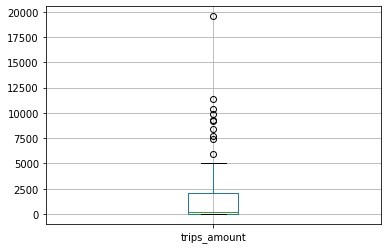

In [89]:
df_cmpnytrip.boxplot()

**CONCLUSION**

- The boxplot for companies shows that many locations have trip_amounts above the 75% quartile.
- Mean is higher than the 75% quartile range, that implies many trip_amounts are above the 75% quartile range.

In [90]:
df_cmpnytrip['bins']  = pd.cut(df_cmpnytrip['trips_amount'],10 )
df_cmpnytrip_bins_stats = df_cmpnytrip.pivot_table(index='bins',values=['trips_amount'],aggfunc=['sum','count'])
df_cmpnytrip_bins_stats.columns=['sum_trips_amount','total_companies']
display(
df_cmpnytrip.pivot_table(index=['bins','company_name'],values=['trips_amount'],aggfunc=['sum']).head(),
df_cmpnytrip.pivot_table(index=['bins','company_name'],values=['trips_amount'],aggfunc=['sum']).tail(),
df_cmpnytrip_bins_stats)

sum
                                               trips_amount
bins              company_name                             
(-17.556, 1957.6] 0118 - 42111 Godfrey S. Awir           33
                  1085 - 72312 N and W Cab Co            29
                  1469 - 64126 Omar Jada                 36
                  2092 - 61288 Sbeih Company             27
                  2192 - 73487 Zeymane Corp              14

sum
                                                   trips_amount
bins               company_name                                
(7824.4, 9780.0]   Taxi Affiliation Service Yellow         9299
(9780.0, 11735.6]  Medallion Leasing                      10367
                   Taxi Affiliation Services              11422
                   Yellow Cab                              9888
(17602.4, 19558.0] Flash Cab                              19558

,sum_trips_amount,total_companies
bins,,
"(-17.556, 1957.6]",15590,47
"(1957.6, 3913.2]",13051,5
"(3913.2, 5868.8]",9398,2
"(5868.8, 7824.4]",21109,3
"(7824.4, 9780.0]",26928,3
"(9780.0, 11735.6]",31677,3
"(11735.6, 13691.2]",0,0
"(13691.2, 15646.8]",0,0
"(15646.8, 17602.4]",0,0


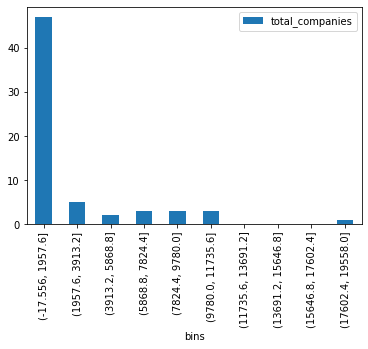

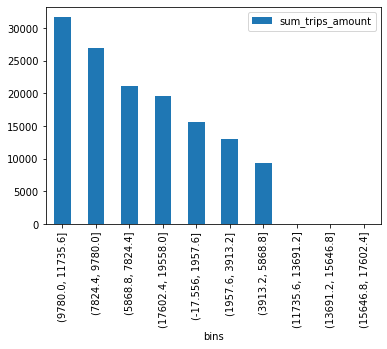

In [91]:
#Bar chart for top 10 companies
df_cmpnytrip_bins_stats[['total_companies']].plot(kind='bar')
df_cmpnytrip_bins_stats[['sum_trips_amount']].sort_values(by=['sum_trips_amount'],ascending=False).plot(kind='bar')

**CONCLUSION**

- The above range based analysis displays that 47 comapnies had approximately 2000 trips each, and 1 company had more than 19558 trips. This 1 company may be the airport service.
- This proves the skewness in the distribution.

In [92]:
#- identify the top 10 companies in terms of trip amounts
cmpnytrip_stats = df_cmpnytrip.pivot_table(index=['company_name'],aggfunc='sum').sort_values(['trips_amount'],ascending=False)
cmpnytrip_stats_top_ten = cmpnytrip_stats.head(10)
display(cmpnytrip_stats_top_ten)

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasing,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


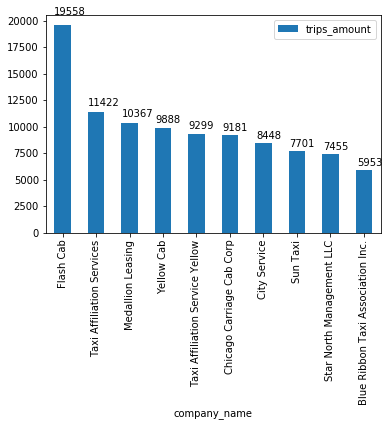

<Figure size 1440x1440 with 0 Axes>

In [93]:
#Bar chart top-10 companies
ax = cmpnytrip_stats_top_ten.plot(kind='bar')
plt.figure(figsize=(20,20))
for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.05))
plt.show()

**CONCLUSION**
- This bar chart displays the top 10 companies from the highest number of trips to the lowest.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


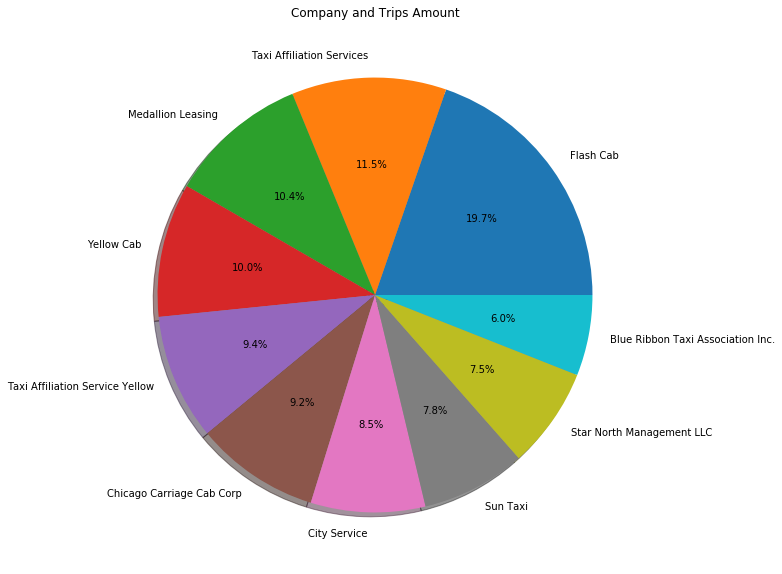

In [94]:
#Pie chart top 10 companies
labels = cmpnytrip_stats_top_ten.index
plt.figure(figsize=(10,10))
plt.pie(cmpnytrip_stats_top_ten,labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('Company and Trips Amount')
plt.show()

**CONCLUSION**

- Biggest share is of Flash Cab, Taxi Affiliation Services, Medallion Leasing.

# Analysis of  Weather and Trip times

In [95]:
#Rides from Loop to O'Hare airport
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'])
df_weather['weekday']= df_weather['start_ts'].dt.weekday_name
df_weather['month'] = df_weather['start_ts'].dt.month
df_weather['duration_minutes'] = df_weather['duration_seconds']/60 
display(df_weather['weekday'].value_counts,df_weather['month'].value_counts)
display(df_weather.head(5))

<bound method IndexOpsMixin.value_counts of 0       Saturday
1       Saturday
2       Saturday
3       Saturday
4       Saturday
          ...   
1063    Saturday
1064    Saturday
1065    Saturday
1066    Saturday
1067    Saturday
Name: weekday, Length: 1068, dtype: object>

<bound method IndexOpsMixin.value_counts of 0       11
1       11
2       11
3       11
4       11
        ..
1063    11
1064    11
1065    11
1066    11
1067    11
Name: month, Length: 1068, dtype: int64>

,start_ts,weather_conditions,duration_seconds,weekday,month,duration_minutes
0,2017-11-25 16:00:00,Good,2410.0,Saturday,11,40.166667
1,2017-11-25 14:00:00,Good,1920.0,Saturday,11,32.000000
2,2017-11-25 12:00:00,Good,1543.0,Saturday,11,25.716667
3,2017-11-04 10:00:00,Good,2512.0,Saturday,11,41.866667
4,2017-11-11 07:00:00,Good,1440.0,Saturday,11,24.000000


**CONCLUSION**

- All records are for Saturday, hence we donot need to check for Saturday.
- All records with weather_conditions of "Bad" are Rainy ss Saturday or some other day. 
- Data collected is in the month of November which is usually bad weather (rain, snow) in Chicago so we should expect more bad weather days and less good weather days.
- We need to check for Rainy Saturdays.

In [96]:
df_weather[['duration_minutes']].describe()

,duration_minutes
count,1068.000000
mean,34.528855
std,12.824352
min,0.000000
25%,23.970833
50%,33.000000
75%,43.000000
max,124.000000


In [97]:
#make two dataframes, for good and bad weather
df_weather_good = df_weather[df_weather['weather_conditions']=='Good']['duration_seconds']
df_weather_bad =  df_weather[df_weather['weather_conditions']=='Bad']['duration_seconds']

In [98]:
df_weather_stats = df_weather.pivot_table(index='weather_conditions',values='duration_seconds',aggfunc=['count','mean','var'])
df_weather_stats.columns=['total_count','mean_duration','variance']
df_weather_stats

,total_count,mean_duration,variance
weather_conditions,,,
Bad,180,2427.205556,520294.086002
Good,888,1999.675676,576382.009690


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


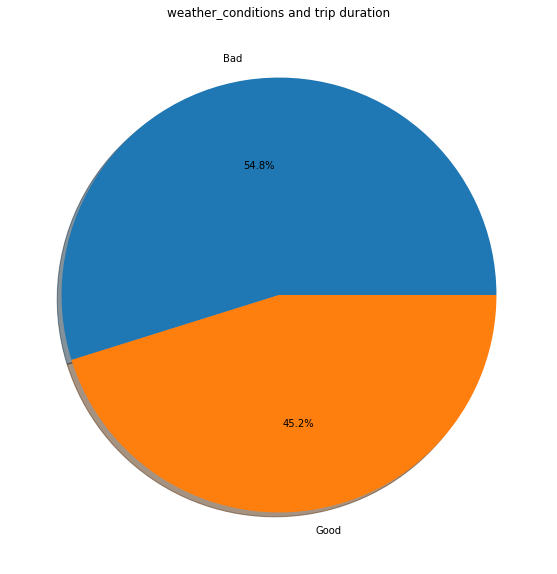

In [99]:
labels = df_weather_stats.index
plt.figure(figsize=(10,10))
plt.pie(df_weather_stats[['mean_duration']],labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('weather_conditions and trip duration')
plt.show()

**CONCLUSION**

- There are 180 bad weather trips and 888 good weather trips.
- Bad weather trips have a higher %age of trip duration than the good weather trips.

In [100]:
df_weather['bins']  = pd.cut(df_weather['duration_minutes'],5)
df_weather_bins_stats2 = df_weather.pivot_table(index=['bins','weather_conditions'],values=['duration_minutes'],aggfunc=['mean','count'])
df_weather_bins_stats2.columns=['average_minutes','total_trips']
display(df_weather_bins_stats2.head(10))

average_minutes  total_trips
bins           weather_conditions                              
(-0.124, 24.8] Bad                       21.072222         24.0
               Good                      21.480339        295.0
(24.8, 49.6]   Bad                       39.291667        116.0
               Good                      35.518455        494.0
(49.6, 74.4]   Bad                       54.744872         39.0
               Good                      55.982982         95.0
(74.4, 99.2]   Bad                       83.000000          1.0
               Good                      81.500000          2.0
(99.2, 124.0]  Good                     115.500000          2.0

Text(0, 0.5, 'Total trips, Average minutes')

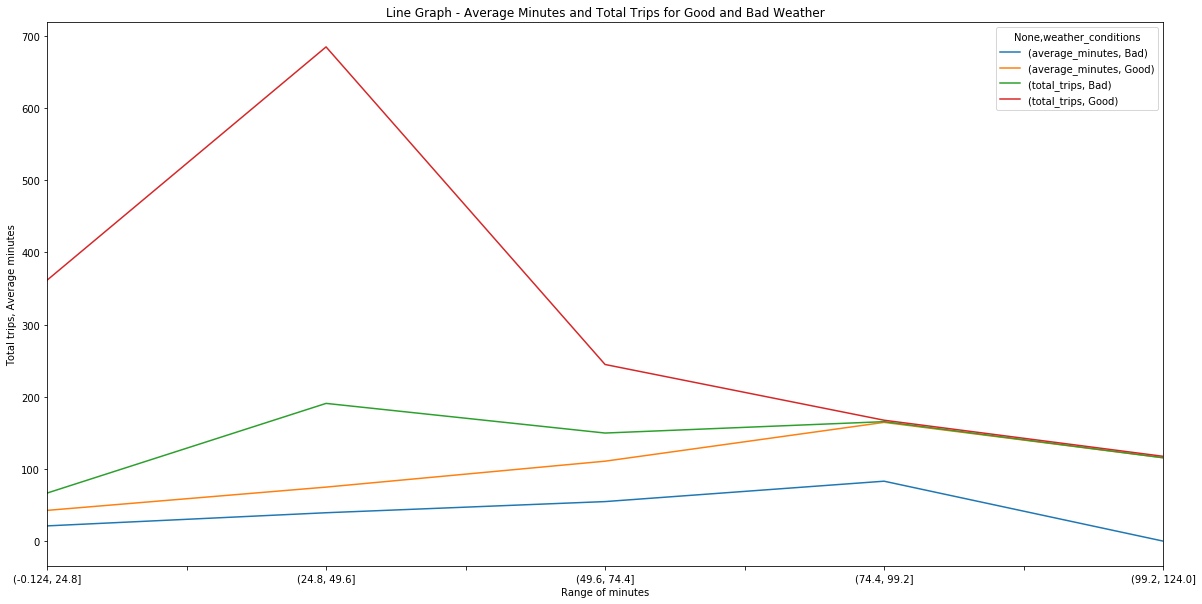

In [101]:
#Line graph for good, bad weather - Number of trips, and Duration of trips.
df_weather_bins_stats2.unstack(level=1).plot(kind='line',figsize=(20, 10),stacked=True)  
plt.title("Line Graph - Average Minutes and Total Trips for Good and Bad Weather")
plt.xlabel("Range of minutes")
plt.ylabel("Total trips, Average minutes")

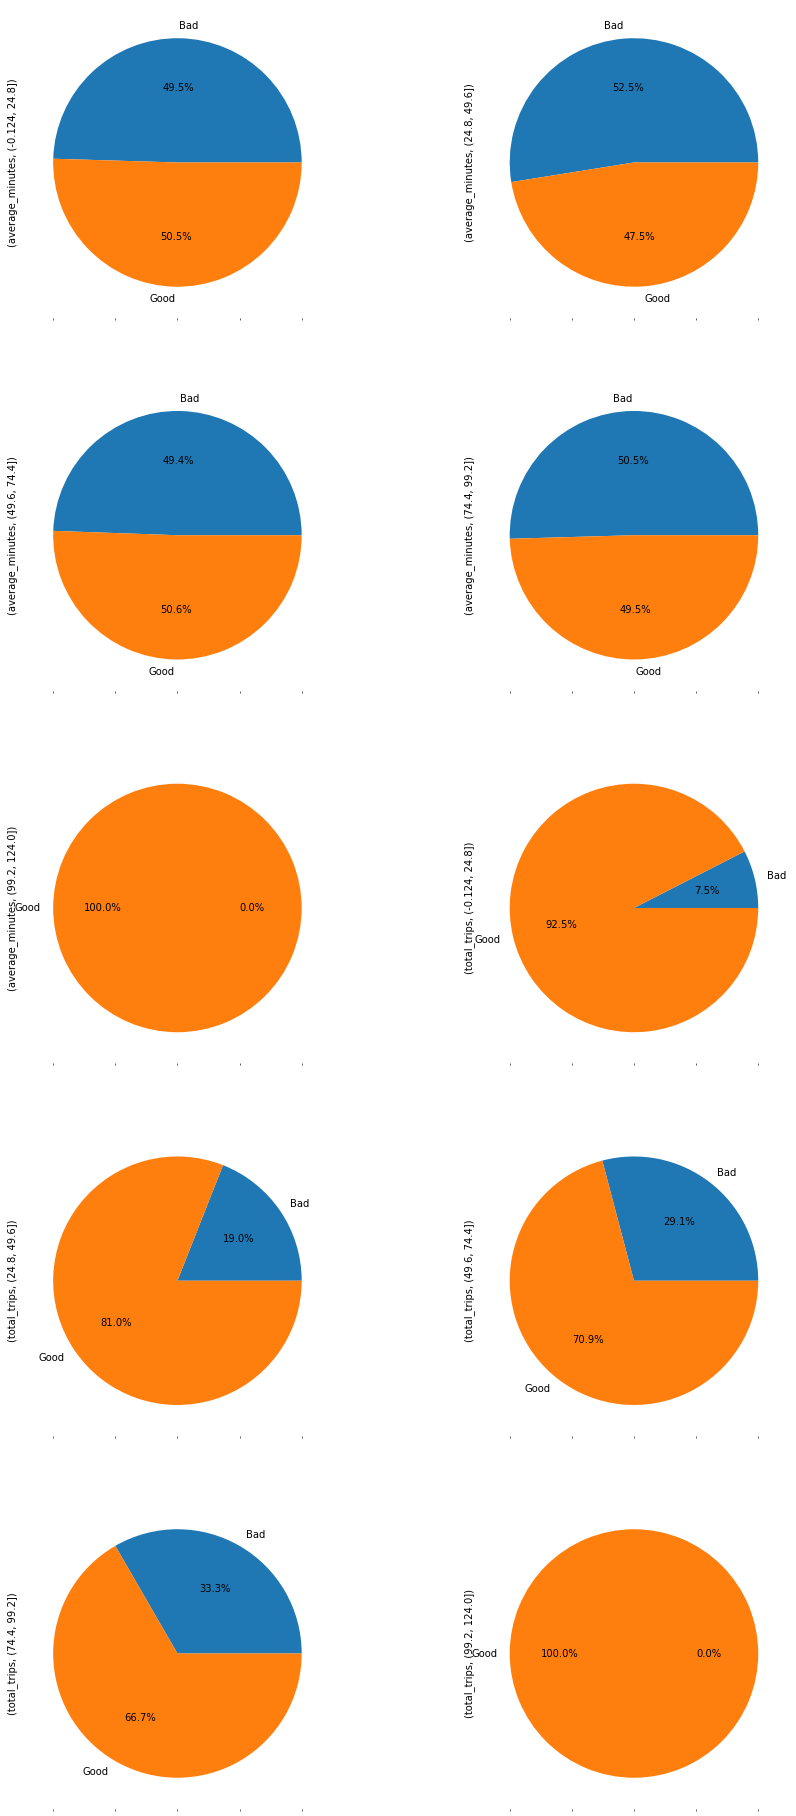

In [102]:
#pie charts for different time ranges, and trip durations for good and bad weather
plot = df_weather_bins_stats2.unstack(level=0).plot.pie(subplots=True,figsize=(15, 40),layout=(6,2),legend=False,autopct='%1.1f%%');

**CONCLUSION**

- The above range based analysis displays that Good and Bad weather trips had approximately same average minutes. 
- There were more good weather trips of longer duration (above 99 minutes). There were no trips of 99 minutes or above on the Bad weather. 
- The bad weather trip duration was a but longer than the good weather. 
- There were more good weather trips than bad weather trips.

# Step 5. Testing hypothesis (Python)

**/datasets/project_sql_result_07.csv**
— the result of the last query. It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:
- start_ts
- pickup date and time
- weather_conditions
- weather conditions at the moment the ride started
- duration_seconds
- ride duration in seconds

**Test the hypothesis:**
- "The average duration of rides from the Loop to O'Hare International Airport changes on rainy -  Saturdays."
- Decide where to set the significance level (alpha) on your own.
**Explain:**
- how you formed the null and alternative hypotheses
- what criterion you used to test the hypotheses and why


In [103]:
df_weather_stats

,total_count,mean_duration,variance
weather_conditions,,,
Bad,180,2427.205556,520294.086002
Good,888,1999.675676,576382.009690


**Important Note:**

- The equal-variance (Student) t-test itself is merely an (ill-understood) approximation when the population sample variances are unequal and the sample sizes are also different. Therefore, unless it is known that the population variances are equal, it is better to use an approximation to the correct sampling distribution (the Welch-Satterthwaite) than to use a perfectly accurate distribution that does not apply to the data model.

- Hence we use Welch's t-test instead of Student's t-test

- Good weather has a mean of 2000
- Bad weather has a mean of 2427

These are not close values. The variances are different and sample sizes are unequal (880 vs 180), hence we should 
- proceed with Hypothesis check using Welch's Test (equal_var = False)
- Since the possibility of the Good weather vs Rainy Saturday having equal duration trips is very less (as seen by mean and variance), we will set alpha to very very low value. 0.00001.
- When the occurrence of the event is rare, we should set a very low alpha. The rarer it is, the lower the alpha.

**Null Hypothesis:**  The average duration of rides from the Loop to O'Hare International Airport is the same as on rainy - Saturdays.

**Alternative Hypothesis:**
The average duration of rides from the Loop to O'Hare International Airport  changes on rainy - Saturdays.

In [104]:
alpha = .00001 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

#Since the size and variances of the statistical populations from which the sample is taken
#are not equal, we need to set the 'equal_var' parameter to False
results = st.ttest_ind(
        df_weather_good,df_weather_bad,equal_var=False)

p_value = results.pvalue
print('p-value: ', p_value)

if (p_value < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  6.738994326108734e-12
We reject the null hypothesis


# CONCLUSION

- Since the p-value is much less than alpha (0.00001), we reject the null hypothesis. Even with such low value of alpha, we had the null hypothesis rejected.

- Our null hypothesis: Average duration of rides for the good and bad weather(rainy Saturdays) is almost same. However, the mean the good and rainy Saturdays differs by 500 seconds. Mean values differ by 25%.

- Alternative hypothesis to prove:  The average duration of rides from the Loop to O'Hare International Airport changes on rainy - Saturdays.

- We reject the null hypothesis since the p_value is much less than alpha (0.00001). Hence we conclude that  the Alternative Hypothesis holds - "The average duration of rides from the Loop to O'Hare International Airport changes on rainy - Saturdays."

- Since we rejected the null hypothesis, we conclude that  the Alternative Hypothesis holds.

# OVERALL CONCLUSION

**DATA QUALITY**
- Amount of data: As compared to previous projects, this project has relatively lower amount of data (around 1000) records each.
- Null values: Data was very clean. No nan values.
- Outliers: There seem to be a very few higher value outliers which skewed the data to right. However, sometimes the taxi driving can take longer times. Hence, I didn't change or remove these outliers.
- Datatype change: In weather data, changed the start_ts to datetime format, also converted the rides in seconds to minutes because rides are usually measured in minute increments not second increments.

**DATA ANALYSIS**

LOCATION DATA
- Location data had most data concentrated in the 1000 trips for most drop-off locations, 2 locations had very high trip amounts. These may be due to their nearness to shopping and eatery. 
- I checked Loop and Rivernorth locations and these are downtown vibrant areas which people mostly visit for food, shopping and entertainment. People also use taxi services for drop-off in these areas because of heavy traffic and scarcity of parking or high parking costs.

COMPANY DATA
- Company data showed the taxi trips by each company
- Most companies were concentrated in 2000 trips or less
- 1 company (Flash Cab) had more than 15000 trips. This company may be the main taxi service company in Chicago. 2 other companies are the next highest in number of trips. These three companies caused a right skewed distribution.

WEATHER DATA

- I added columns for weekday, minutes. 
- I also found out that all data was for the month of November, Saturdays (good or bad weather).
- Then I categorized the data based on trip duration (5 ranges), and weather conditions. 
- I found out that majority of trips were in good weather. The good weather had the longest time trips. Bad weather had no trip in the longest time range.

**DATA REPORTS (GRAPHS)**

For location and company data:
- I drew distribution plot, box plot and found out the distribution was skewed to the right.
- Then I categorized the data in 10 ranges based on the number of trips. The categorized data showed the reason of skewed distribution clearly.
- Then I located the top-10 locations/companies with highest number of trips.
- I drew bar charts and pie chart for the top 10 locations, companies. 
- The right skew clearly identifies the top locations of dropoffs (downtown, shopping, vibrant area) and top taxi companies.

For Weather:

- I checked mean, and standard deviation for good and bad weather.
- I also plotted line graph for the duration and number of trips. 
- I showed the %age time and %age number of trips for each good and bad weather in 5 time ranges (minutes).
- These time ranges displayed that the taxis that used the maximum time were used in good weather and not in bad weather.


**HYPOTHESIS**

- Null Hypothesis: The average duration of rides from the Loop to O'Hare International Airport is the same as on rainy - Saturdays.

- Alternative Hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy - Saturdays.

- Since the sample sizes for good and bad weather were very different, good weather had 888 records whereas bad weather had only 180 records. The Standard deviation was also different. I checked the mean, and then used Welch's test.
- Null hypothesis was rejected.
- Hence we should accept the Alternative Hypothesis.


**MY OPINION**
- Taxi services in the most desired travel locations benefit the most.
- People like to use taxi services for downtown eg Loop and Rivernorth locations where they can have food, shopping and entertainment.
- Some taxi companies have a large marketshare (Flash, Medallion, Taxi Affiliation)
- Weather does play a major role in usage of taxi services.
- People use more taxi services in Good weather. This implies that they go to the vibrant communities more using taxis during good weather.
- During bad weather, people may be using the taxi service for mandatory travel like travelling to the airport or business.
- Taxi services have competitors - ride sharing companies. These companies may not share their data and hence our analysis and reporting may be flawed since we don't have data from ride sharing companies that people may be using.

# Checklist
- X- how you retrieve data from the website
- X- how you make data slices
- X- how you group data
- X- whether you use the various methods for combining data correctly
- X- how you formulate hypotheses
- X- what criteria you use to test the hypotheses and why
- X- what conclusions you reach
- X- whether you leave comments at each step
